In [1]:
pip install transformers torch numpy gudhi -q

Note: you may need to restart the kernel to use updated packages.


In [44]:
from transformers import BertModel, BertTokenizer
import torch

tokenizer = BertTokenizer.from_pretrained('onlplab/alephbert-base')
model = BertModel.from_pretrained('onlplab/alephbert-base')

#text = "בְּרֵאשִׁית הַשָּׁבוּעַ הַבָּא אֲנִי מְתַכְּנֵן לָלֶכֶת לְמַסְעֵדָה שֶׁבַּשּׁוּק הַמְּהוּדָּר. זוּ אַף פַּעַם לֹא הָיְתָה לִי הַזְּמַן לְהִתְרַשֵּׁם מֵאֹוכֵל הַמְּעוּלֶּה שֶׁלָּהֶם. אֲנִי אַף כֵּן אֹוהֵב לְהַסְתַּכֵּל בְּנִפְלָאוֹת הַטֶּבַע וּלְצַפּוֹת בְּזִרְחָת הַשֶּׁמֶשׁ. בְּמַחֲשֵׁבָה מְאוּחָרֶת, אֲנִי יָכוֹל לְהַזְמִין פִּצָּה וּלְהַסְתַּכֵּל בְּזִרְחָת הַשֶּׁמֶשׁ מִבַּלְקוֹן שֶׁלִּי."
text = "בראשית השבוע הבא אני מתכנן ללכת למסעדה שבשוק המהודר. זו אף פעם לא היתה לי הזמן להתרשם מאוכל המעולה שלהם. אני אף כן אוהב להסתכל בנפלאות הטבע ולצפות בזרחת השמש. במחשבה מאוחרת, אני יכול להזמין פיצה ולהסתכל בזרחת השמש מבלקון שלי."

inputs = tokenizer(text, return_tensors="pt")

# Specify `output_hidden_states=True` when calling the model
outputs = model(**inputs, output_hidden_states=True)

# Now you can access the hidden states at a specific layer
layer = 7
hidden_states = outputs.hidden_states[layer]
print(hidden_states.shape)
print(hidden_states)

Some weights of the model checkpoint at onlplab/alephbert-base were not used when initializing BertModel: ['cls.predictions.decoder.weight', 'cls.predictions.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.decoder.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertModel were not initialized from the model checkpoint at onlplab/alephbert-base and are newly initialized: ['bert.pooler.dense.weight', 'bert.pooler.dense.bias

torch.Size([1, 55, 768])
tensor([[[-0.1518, -0.0064,  0.0253,  ...,  0.0830, -0.0907,  0.0822],
         [-0.3917, -0.0130, -0.1552,  ...,  0.5345,  0.0765,  0.4831],
         [-1.5287, -0.0219, -0.9446,  ...,  0.3730, -0.3619,  0.0031],
         ...,
         [ 0.6531, -0.7591, -1.3876,  ..., -0.2195,  0.3479,  0.6151],
         [ 0.8665,  0.3560, -2.6117,  ...,  0.3715,  0.5730, -0.0100],
         [-0.0794,  0.0103,  0.1080,  ...,  0.0417, -0.0843,  0.0321]]],
       grad_fn=<NativeLayerNormBackward0>)


Some weights of the model checkpoint at onlplab/alephbert-base were not used when initializing BertModel: ['cls.predictions.decoder.weight', 'cls.predictions.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.decoder.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertModel were not initialized from the model checkpoint at onlplab/alephbert-base and are newly initialized: ['bert.pooler.dense.weight', 'bert.pooler.dense.bias

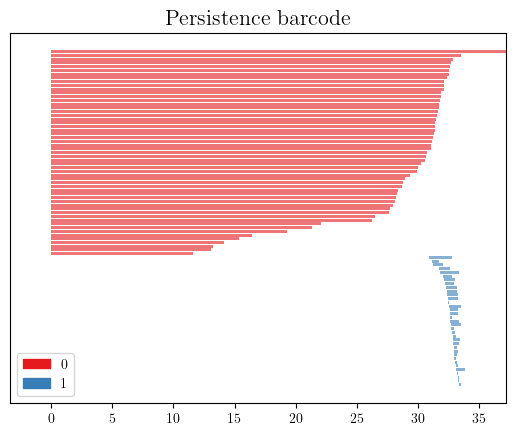

In [45]:
from transformers import BertModel, BertTokenizer
import torch
import matplotlib.pyplot as plt
import numpy as np
from scipy.spatial import distance_matrix
import gudhi as gd

# Define the function
def compute_distances_and_plot_barcode(output):
    # Detach the output tensor, squeeze, and convert to numpy array
    output_np = output.squeeze().detach().numpy()

    # Compute the pairwise Euclidean distance matrix
    distances = distance_matrix(output_np, output_np)

    # Compute the persistent homology of the distance matrix
    rips_complex = gd.RipsComplex(distance_matrix=distances, max_edge_length=np.max(distances))
    simplex_tree = rips_complex.create_simplex_tree(max_dimension=2)
    persistent_homology = simplex_tree.persistence(min_persistence=0.001)
    
    # Plot the barcode diagram
    gd.plot_persistence_barcode(persistence=persistent_homology)
    plt.show()


tokenizer = BertTokenizer.from_pretrained('onlplab/alephbert-base')
model = BertModel.from_pretrained('onlplab/alephbert-base')

#text = "בְּרֵאשִׁית הַשָּׁבוּעַ הַבָּא אֲנִי מְתַכְּנֵן לָלֶכֶת לְמַסְעֵדָה שֶׁבַּשּׁוּק הַמְּהוּדָּר. זוּ אַף פַּעַם לֹא הָיְתָה לִי הַזְּמַן לְהִתְרַשֵּׁם מֵאֹוכֵל הַמְּעוּלֶּה שֶׁלָּהֶם. אֲנִי אַף כֵּן אֹוהֵב לְהַסְתַּכֵּל בְּנִפְלָאוֹת הַטֶּבַע וּלְצַפּוֹת בְּזִרְחָת הַשֶּׁמֶשׁ. בְּמַחֲשֵׁבָה מְאוּחָרֶת, אֲנִי יָכוֹל לְהַזְמִין פִּצָּה וּלְהַסְתַּכֵּל בְּזִרְחָת הַשֶּׁמֶשׁ מִבַּלְקוֹן שֶׁלִּי."
text = "בראשית השבוע הבא אני מתכנן ללכת למסעדה שבשוק המהודר. זו אף פעם לא היתה לי הזמן להתרשם מאוכל המעולה שלהם. אני אף כן אוהב להסתכל בנפלאות הטבע ולצפות בזרחת השמש. במחשבה מאוחרת, אני יכול להזמין פיצה ולהסתכל בזרחת השמש מבלקון שלי."

inputs = tokenizer(text, return_tensors="pt")

# Obtain tokens
tokens = tokenizer.convert_ids_to_tokens(inputs['input_ids'][0])

outputs = model(**inputs, output_hidden_states=True)

layer = 3
hidden_states = outputs.hidden_states[layer]

# Use the function with hidden states from the BERT model
compute_distances_and_plot_barcode(hidden_states)


In [46]:
from scipy.spatial.distance import pdist, squareform
from sklearn.cluster import DBSCAN
from transformers import BertTokenizer
from transformers import BertModel, BertTokenizerFast

from scipy.spatial.distance import pdist, squareform
from sklearn.cluster import DBSCAN

def cluster_and_get_words(hidden_states, tokens, eps=31.0):
    # Squeeze the hidden_states tensor to remove the batch size dimension
    hidden_states = hidden_states.squeeze(0)

    # Compute the pairwise distance matrix
    distances = pdist(hidden_states.detach().numpy(), 'euclidean')
    dist_matrix = squareform(distances)

    # Run DBSCAN on the distance matrix
    clustering = DBSCAN(eps=eps, min_samples=2, metric='precomputed').fit(dist_matrix)

    # Get the words corresponding to each cluster
    clusters = {}
    for i, label in enumerate(clustering.labels_):
        if label != -1:  # Ignore noise (-1 label)
            if label not in clusters:
                clusters[label] = []
            clusters[label].append(tokens[i])

    return clusters

# Compute the clusters for each hidden_states vector
clusters = cluster_and_get_words(hidden_states, tokens)
for label, words in clusters.items():
    print(f"Cluster {label}: {', '.join(words)}")



Cluster 0: [CLS], [SEP]
Cluster 1: בראשית, השבוע
Cluster 2: אני, ., לי, ., אני, ., ,, אני, .
Cluster 3: מתכנן, אוהב
Cluster 4: ללכת, למסעדה, להתרשם, מאוכל, להסתכל, ולצפות, להזמין, פיצה, ולהסת, ##כל
Cluster 5: אף, אף
Cluster 6: לא, היתה
Cluster 7: שלהם, שלי
Cluster 8: בנפ, בזר, בזר
Cluster 9: הטבע, השמש, השמש
Cluster 10: ##חת, ##חת


---

## Individual Attention Heads

In [88]:
#text = ["בְּרֵאשִׁית הַשָּׁבוּעַ הַבָּא אֲנִי מְתַכְּנֵן לָלֶכֶת לְמַסְעֵדָה שֶׁבַּשּׁוּק הַמְּהוּדָּר. זוּ אַף פַּעַם לֹא הָיְתָה לִי הַזְּמַן לְהִתְרַשֵּׁם מֵאֹוכֵל הַמְּעוּלֶּה שֶׁלָּהֶם. אֲנִי אַף כֵּן אֹוהֵב לְהַסְתַּכֵּל בְּנִפְלָאוֹת הַטֶּבַע וּלְצַפּוֹת בְּזִרְחָת הַשֶּׁמֶשׁ. בְּמַחֲשֵׁבָה מְאוּחָרֶת, אֲנִי יָכוֹל לְהַזְמִין פִּצָּה וּלְהַסְתַּכֵּל בְּזִרְחָת הַשֶּׁמֶשׁ מִבַּלְקוֹן שֶׁלִּי"]
text = ["בראשית השבוע הבא אני מתכנן ללכת למסעדה שבשוק המהודר. זו אף פעם לא היתה לי הזמן להתרשם מאוכל המעולה שלהם. אני אף כן אוהב להסתכל בנפלאות הטבע ולצפות בזרחת השמש. במחשבה מאוחרת, אני יכול להזמין פיצה ולהסתכל בזרחת השמש מבלקון שלי"]

In [89]:
import torch
from transformers import BertTokenizer, BertModel
from transformers import BertModel, BertTokenizerFast


def compute_output(sentence, layer, head):
    # Load pre-trained model
    model = BertModel.from_pretrained('bert-base-multilingual-cased', output_attentions=True)
    tokenizer = BertTokenizer.from_pretrained('bert-base-multilingual-cased')

    # model = BertModel.from_pretrained('onlplab/alephbert-base', output_attentions=True)
    # tokenizer = BertTokenizer.from_pretrained('onlplab/alephbert-base')

    # Tokenize input and convert to tensor
    inputs = tokenizer(sentence, return_tensors="pt")

    # Forward pass
    # Specify `output_hidden_states=True` when calling the model
    outputs = model(**inputs, output_hidden_states=True)

    # Obtain the attention weights
    attentions = outputs.attentions

    # Obtain the attention weights for the specific layer and head
    S = attentions[layer][0, head]

    # Obtain the value vectors
    model.eval()
    with torch.no_grad():
        hidden_states = outputs.hidden_states[layer]
        all_W_v = model.encoder.layer[layer].attention.self.value.weight
        num_heads = model.config.num_attention_heads
        head_dim = model.config.hidden_size // num_heads
        W_v_heads = all_W_v.view(num_heads, head_dim, model.config.hidden_size)
        W_v = W_v_heads[head]
        V = torch.matmul(hidden_states, W_v.t())

    # Compute the output O
    O = torch.matmul(S, V)

    return O

In [90]:
# Set the layer and head to use for computation
layer = 5
head = 10

# Compute the context vectors for each text in the corpus
context = [compute_output(t, layer, head) for t in text]
print(context[0].shape)
print(context[0])

Some weights of the model checkpoint at bert-base-multilingual-cased were not used when initializing BertModel: ['cls.predictions.transform.dense.weight', 'cls.predictions.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


torch.Size([1, 93, 64])
tensor([[[-9.9539e-03,  2.5529e-02,  1.9886e-01,  ..., -2.1616e-02,
           3.7504e-01, -3.7590e-01],
         [ 2.4918e-01,  5.2500e-02, -2.4477e-01,  ..., -1.3848e-01,
          -5.9417e-02, -1.6409e-01],
         [ 4.4128e-01,  2.0910e-01, -1.8328e-01,  ..., -1.9535e-02,
           1.3512e-04, -2.6225e-01],
         ...,
         [ 1.6806e-02, -3.9879e-01,  6.6949e-02,  ...,  2.2690e-03,
           1.7661e-01,  1.6385e-01],
         [ 4.1811e-01, -4.9856e-01,  2.3517e-01,  ..., -8.7492e-01,
           2.2135e-01,  2.1190e-01],
         [ 4.0819e-02,  1.7157e-01,  2.8649e-01,  ...,  3.4277e-02,
           4.6300e-01, -6.0914e-01]]], grad_fn=<CloneBackward0>)


In [91]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.spatial import distance_matrix
import gudhi as gd

def compute_distances_and_plot_barcode(output):
    # Detach the output tensor, squeeze, and convert to numpy array
    output_np = output.squeeze().detach().numpy()

    # Compute the pairwise Euclidean distance matrix
    distances = distance_matrix(output_np, output_np)

    # Compute the persistent homology of the distance matrix
    rips_complex = gd.RipsComplex(distance_matrix=distances, max_edge_length=np.max(distances))
    simplex_tree = rips_complex.create_simplex_tree(max_dimension=2)
    persistent_homology = simplex_tree.persistence(min_persistence=0.001)
    
    # Plot the barcode diagram
    gd.plot_persistence_barcode(persistence=persistent_homology)
    plt.show()

Barcode for text 0:


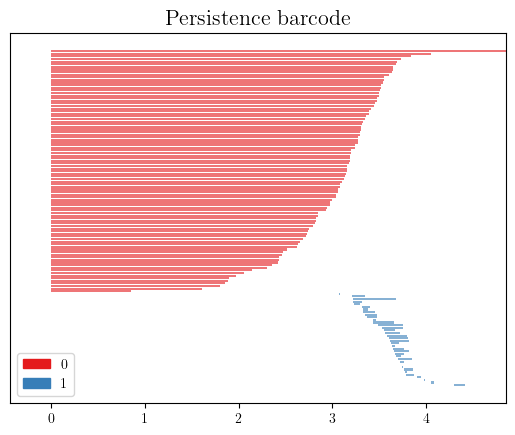

In [92]:
# Compute the barcode diagrams for each context vector
for i, output in enumerate(context):
    print(f"Barcode for text {i}:")
    compute_distances_and_plot_barcode(output)

In [93]:
from scipy.spatial.distance import pdist, squareform
from sklearn.cluster import DBSCAN
from transformers import BertTokenizer
from transformers import BertModel, BertTokenizerFast

def cluster_and_get_words(context, sentence, eps=3.05):
    # Load pre-trained model tokenizer
    tokenizer = BertTokenizer.from_pretrained('bert-base-multilingual-cased')
    # tokenizer = BertTokenizer.from_pretrained('onlplab/alephbert-base')

    # Tokenize input and convert to tensor
    inputs = tokenizer(sentence, return_tensors="pt")
    tokens = tokenizer.convert_ids_to_tokens(inputs['input_ids'][0])

    # Squeeze the context tensor to remove the batch size dimension
    context = context.squeeze(0)

    # Compute the pairwise distance matrix
    distances = pdist(context.detach().numpy(), 'euclidean')
    dist_matrix = squareform(distances)

    # Run DBSCAN on the distance matrix
    clustering = DBSCAN(eps=eps, min_samples=2, metric='precomputed').fit(dist_matrix)

    # Get the words corresponding to each cluster
    clusters = {}
    for i, label in enumerate(clustering.labels_):
        if label != -1:  # Ignore noise (-1 label)
            if label not in clusters:
                clusters[label] = []
            clusters[label].append(tokens[i])

    return clusters

In [94]:
# Compute the clusters for each context vector
clusters = []
for i, output in enumerate(context):
    print(f"Clusters for text {i}:")
    clusters.append(cluster_and_get_words(output, text[i]))
    for label, words in clusters[-1].items():
        print(f"Cluster {label}: {', '.join(words)}")

Clusters for text 0:
Cluster 0: [CLS], בראשית, ##וע, ##כנן, ##לכת, שב, ., זו, ##יתה, לה, מ, שלהם, ., אני, ו, ., ב, [SEP]
Cluster 1: ##שב, ##מה, ##מע
Cluster 2: מת, אף, יכול
Cluster 3: ל, לי, לה
Cluster 4: ##מסע, ##שוק
Cluster 5: פעם, כן
Cluster 6: ##תר, ##סת
Cluster 7: לה, ב, ב
Cluster 8: ##כל, ##כל
Cluster 9: ##נ, ##זר, ##מח, ##זר, ##בל
Cluster 10: ##טבע, ##שמש, ##שמש
Cluster 11: ##חת, ##חת
Cluster 12: ה, ה
Cluster 13: ##ז, ##סת


Here is the paragraph for comparison:

בראשית השבוע הבא אני מתכנן ללכת למסעדה שבשוק המהודר. זו אף פעם לא היתה לי הזמן להתרשם מאוכל המעולה שלהם. אני אף כן אוהב להסתכל בנפלאות הטבע ולצפות בזרחת השמש. במחשבה מאוחרת, אני יכול להזמין פיצה ולהסתכל בזרחת השמש מבלקון שלי

Here are some of the collocations and multiword expressions in the Hebrew paragraph along with their English translations:

1. בראשית השבוע - "at the beginning of the week" or "early in the week"
2. השבוע הבא - "next week"
3. מתכנן ללכת - "planning to go"
4. למסעדה שבשוק - "to a restaurant in the market"
5. אף פעם - "never" (literally, "not once")
6. לא היתה לי הזמן - "I never had the time" (literally, "there was never time for me")
7. להתרשם מאוכל - "to be impressed by the food"
8. אוהב להסתכל - "love to look/watch"
9. נפלאות הטבע - "wonders of nature"
10. לצפות בזרחת השמש - "to watch the sunrise"
11. במחשבה מאוחרת - "on second thought" (literally, "in a later thought")
12. להזמין פיצה - "to order pizza"
13. מבלקון שלי - "from my balcony"

Each of these expressions is a set phrase or combination of words that often appear together and convey a meaning that is more than the sum of their parts.

Tokens of the sub-collection: "לצפות בזרחת השמש" for the `bert-base-multilingual-cased` tokenizer are:
['ל', '##צ', '##פות', 'ב', '##זר', '##חת', 'ה', '##שמש']

Notice that some of these subwords and individual characters appear as tokens in multiple places in the tokenized version of the text:

['בראשית', 'ה', '##שב', '##וע', 'הבא', 'אני', 'מת', '##כנן', 'ל', '##לכת', 'ל', '##מסע', '##דה', 'שב', '##שוק', 'ה', '##מה', '##וד', '##ר', '.', 'זו', 'אף', 'פעם', 'לא', 'ה', '##יתה', 'לי', 'הזמן', 'לה', '##תר', '##שם', 'מ', '##או', '##כל', 'ה', '##מע', '##ולה', 'שלהם', '.', 'אני', 'אף', 'כן', 'או', '##ה', '##ב', 'לה', '##סת', '##כל', 'ב', '##נ', '##פל', '##אות', 'ה', '##טבע', 'ו', '##ל', '##צ', '##פות', 'ב', '##זר', '##חת', 'ה', '##שמש', '.', 'ב', '##מח', '##שבה', 'מאוחר', '##ת', ',', 'אני', 'יכול', 'לה', '##ז', '##מין', 'פי', '##צה', 'ו', '##לה', '##סת', '##כל', 'ב', '##זר', '##חת', 'ה', '##שמש', 'מ', '##בל', '##קון', 'של', '##י']

This makes comparing the persistent homology of a collocation or multiword expression in one context to another very difficult. If we use a different tokenizer such as `onlplab/alephbert-base` we instead get 

Tokens of the sub-collection: ['לצפות', 'בזר', '##חת', 'השמש']

For the full text tokenization:

['בראשית', 'השבוע', 'הבא', 'אני', 'מתכנן', 'ללכת', 'למסעדה', 'שבש', '##וק', 'המה', '##ודר', '.', 'זו', 'אף', 'פעם', 'לא', 'היתה', 'לי', 'הזמן', 'להתרשם', 'מאוכל', 'המעולה', 'שלהם', '.', 'אני', 'אף', 'כן', 'אוהב', 'להסתכל', 'בנפ', '##לאות', 'הטבע', 'ולצפות', 'בזר', '##חת', 'השמש', '.', 'במחשבה', 'מאוחרת', ',', 'אני', 'יכול', 'להזמין', 'פיצה', 'ולהסת', '##כל', 'בזר', '##חת', 'השמש', 'מבל', '##קון', 'שלי']

This makes things a bit easier as the words do not get split into as many pieces. 


The tokenization process in BERT models is a fundamental step in the pipeline for transforming raw text data into a format that can be processed by the model. The tokenizer is responsible for converting the input text into a sequence of numerical tokens that the model can understand. BERT uses a WordPiece tokenizer, which is a subword tokenizer that strikes a balance between the two extremes of character and word-level tokenization. 

WordPiece tokenization is a kind of subword tokenization method. It tokenizes a word into a sequence of subwords, where each subword is a "piece" of the original word. This approach allows the model to handle out-of-vocabulary words and reduce the size of the vocabulary, which can improve the efficiency and performance of the model.

The process of WordPiece tokenization can be described as follows:

1. **Vocabulary Building**: The WordPiece tokenizer starts by building a base vocabulary of individual characters present in the training corpus. This vocabulary is then incrementally expanded by choosing the most frequent or representative combinations of existing words or word pieces in the corpus. The frequency of a word piece is calculated by multiplying its frequency in the corpus by the number of characters it consists of. This encourages the selection of longer word pieces.

    If $C$ is the set of all possible character sequences, and $f(w)$ is the frequency of a sequence $w$ in the training corpus, then the score of a sequence $w$ is given by $|w| \cdot f(w)$. During the vocabulary building phase, the tokenizer iteratively chooses the sequence $w^*$ with the maximum score:

    $$w^* = \arg\max_{w \in C} \left( |w| \cdot f(w) \right)$$

    This sequence is then added to the vocabulary, and the process is repeated until the vocabulary reaches a predetermined size.

2. **Tokenization**: Given an input sentence, the WordPiece tokenizer tokenizes it into a sequence of word pieces from the vocabulary. It starts by checking if the whole word is in the vocabulary. If it is, the word is preserved as is. If not, the tokenizer tries to break the word down into the largest possible subwords present in the vocabulary, starting from the beginning of the word. This process is repeated recursively on any remaining characters until the whole word is tokenized. 

    If $V$ is the vocabulary, and $w$ is a word to be tokenized, then the tokenization process can be formally described as follows:

    $$\text{tokenize}(w) = 
    \begin{cases} 
      w & \text{if } w \in V \\
      \max_{i: w_{1:i} \in V} \left( w_{1:i} \oplus \text{tokenize}(w_{i+1:}) \right) & \text{otherwise}
    \end{cases}$$

    where $w_{1:i}$ denotes the first $i$ characters of $w$, $\oplus$ denotes concatenation of token sequences, and $\max$ is taken with respect to the length of the first token in the sequence.

Note that the BERT tokenizer also adds special tokens `[CLS]` and `[SEP]` at the beginning and end of the sentence, respectively. These tokens are used by BERT for classification tasks and to distinguish between different sentences.

In this way, the WordPiece tokenizer allows BERT to handle a wide variety of words and languages, while maintaining a manageable vocabulary size and enabling the sharing of parameters between similar words.

In [106]:
from transformers import BertTokenizer

# Load pre-trained model tokenizer
model_name = 'bert-base-multilingual-cased'
tokenizer = BertTokenizer.from_pretrained(model_name)

text = ["בראשית השבוע הבא אני מתכנן ללכת למסעדה שבשוק המהודר. זו אף פעם לא היתה לי הזמן להתרשם מאוכל המעולה שלהם. אני אף כן אוהב להסתכל בנפלאות הטבע ולצפות בזרחת השמש. במחשבה מאוחרת, אני יכול להזמין פיצה ולהסתכל בזרחת השמש מבלקון שלי"]

# Tokenize the sentence
tokens = tokenizer.tokenize(text[0])

print(tokens)


['בראשית', 'ה', '##שב', '##וע', 'הבא', 'אני', 'מת', '##כנן', 'ל', '##לכת', 'ל', '##מסע', '##דה', 'שב', '##שוק', 'ה', '##מה', '##וד', '##ר', '.', 'זו', 'אף', 'פעם', 'לא', 'ה', '##יתה', 'לי', 'הזמן', 'לה', '##תר', '##שם', 'מ', '##או', '##כל', 'ה', '##מע', '##ולה', 'שלהם', '.', 'אני', 'אף', 'כן', 'או', '##ה', '##ב', 'לה', '##סת', '##כל', 'ב', '##נ', '##פל', '##אות', 'ה', '##טבע', 'ו', '##ל', '##צ', '##פות', 'ב', '##זר', '##חת', 'ה', '##שמש', '.', 'ב', '##מח', '##שבה', 'מאוחר', '##ת', ',', 'אני', 'יכול', 'לה', '##ז', '##מין', 'פי', '##צה', 'ו', '##לה', '##סת', '##כל', 'ב', '##זר', '##חת', 'ה', '##שמש', 'מ', '##בל', '##קון', 'של', '##י']


In [121]:
from transformers import BertTokenizer

# Load pre-trained model tokenizer
model_name = 'onlplab/alephbert-base'
tokenizer = BertTokenizer.from_pretrained(model_name)

text = ["בראשית השבוע הבא אני מתכנן ללכת למסעדה שבשוק המהודר. זו אף פעם לא היתה לי הזמן להתרשם מאוכל המעולה שלהם. אני אף כן אוהב להסתכל בנפלאות הטבע ולצפות בזרחת השמש. במחשבה מאוחרת, אני יכול להזמין פיצה ולהסתכל בזרחת השמש מבלקון שלי"]

# Tokenize the sentence
tokens = tokenizer.tokenize(text[0])

print(tokens)

['בראשית', 'השבוע', 'הבא', 'אני', 'מתכנן', 'ללכת', 'למסעדה', 'שבש', '##וק', 'המה', '##ודר', '.', 'זו', 'אף', 'פעם', 'לא', 'היתה', 'לי', 'הזמן', 'להתרשם', 'מאוכל', 'המעולה', 'שלהם', '.', 'אני', 'אף', 'כן', 'אוהב', 'להסתכל', 'בנפ', '##לאות', 'הטבע', 'ולצפות', 'בזר', '##חת', 'השמש', '.', 'במחשבה', 'מאוחרת', ',', 'אני', 'יכול', 'להזמין', 'פיצה', 'ולהסת', '##כל', 'בזר', '##חת', 'השמש', 'מבל', '##קון', 'שלי']


Tokens of the sub-collection: ['לצפות', 'בזר', '##חת', 'השמש']
Distance matrix: (6, 6)
Distance matrix: [[0.         4.35641803 4.28366034 4.87074894 4.20249509 5.35844053]
 [4.35641803 0.         3.55068096 4.66841936 4.36021109 4.08999466]
 [4.28366034 3.55068096 0.         4.26624512 4.81289838 5.00046693]
 [4.87074894 4.66841936 4.26624512 0.         3.95819007 4.73680211]
 [4.20249509 4.36021109 4.81289838 3.95819007 0.         4.19407435]
 [5.35844053 4.08999466 5.00046693 4.73680211 4.19407435 0.        ]]


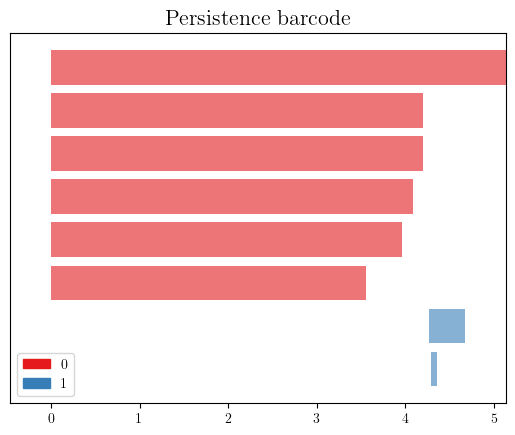

In [120]:
from scipy.spatial import distance_matrix
import gudhi as gd
import numpy as np
import matplotlib.pyplot as plt
from transformers import BertTokenizer

def compute_phrase_distances_and_homology(context_vectors, sentence, phrase):
    # Initialize the tokenizer
    # tokenizer = BertTokenizer.from_pretrained('bert-base-multilingual-cased')
    tokenizer = BertTokenizer.from_pretrained('onlplab/alephbert-base')

    # Tokenize the sentence and the phrase
    sentence_tokens = tokenizer.encode(sentence, add_special_tokens=False)
    phrase_tokens = tokenizer.encode(phrase, add_special_tokens=False)

    # Find the indices of the phrase tokens in the sentence
    phrase_indices = [i for i, token in enumerate(sentence_tokens) if token in phrase_tokens]

    # Extract the context vectors for the phrase
    phrase_context_vectors = context_vectors[0, phrase_indices]

    # Detach the tensor and convert to numpy array
    phrase_context_vectors_np = phrase_context_vectors.detach().numpy()

    # Print the tokens of the sub-collection and their context vectors
    print(f'Tokens of the sub-collection: {tokenizer.convert_ids_to_tokens(phrase_tokens)}')
    # print(f'Context vectors of the sub-collection: {phrase_context_vectors_np}')

    # Compute the pairwise Euclidean distances among the phrase context vectors
    distances = distance_matrix(phrase_context_vectors_np, phrase_context_vectors_np)

    # Print the distance matrix
    print(f'Distance matrix: {distances.shape}')
    print(f'Distance matrix: {distances}')

    # Compute the persistent homology of the distance matrix
    rips_complex = gd.RipsComplex(distance_matrix=distances, max_edge_length=np.max(distances))
    simplex_tree = rips_complex.create_simplex_tree(max_dimension=2)
    persistent_homology = simplex_tree.persistence(min_persistence=0.001)

    # Plot the barcode diagram
    gd.plot_persistence_barcode(persistence=persistent_homology)
    plt.show()

# Assuming that 'context_vectors' is the tensor of context vectors for your sentence,
# and 'sentence' is your original sentence, you can use the function like this:
compute_phrase_distances_and_homology(context[0], text[0], "לצפות בזרחת השמש")

If we use two texts where the tokens for the multiword expression appear only once in each of the texts, this makes things a little easier. Let's do that for the for the following two texts, and then compare the barcode diagrams using the bottleneck and Wassersteing distances to see how similar the topologcial substructures associated to the multiword expression are.  

In [122]:
text_2 = ["בחופשה האחרונה שלנו, נסענו להכיר את היופיים של מדבר הנגב. בין אם מדובר בצוקים המרשימים, בחי הבר המיוחד, או בשקט המוחלט, יש משהו מאוד מיוחד במדבר. אחת החוויות המרגשות ביותר שלנו הייתה לצפות בזרחת השמש מעל המדבר. האור המתפשט מאחורי ההרים, השמים המשתנים מאוד מהיר מאופל לתכלת, והשלווה המוחלטת שאפשר רק במדבר, הכל הפך את החוויה לבלתי נשכחת"]

Tokens of the sub-collection: ['לצפות', 'בזר', '##חת', 'השמש']
Distance matrix: (4, 4)
Distance matrix: [[0.         4.55260701 4.69202989 5.27904488]
 [4.55260701 0.         3.15951929 3.74406598]
 [4.69202989 3.15951929 0.         4.06625292]
 [5.27904488 3.74406598 4.06625292 0.        ]]


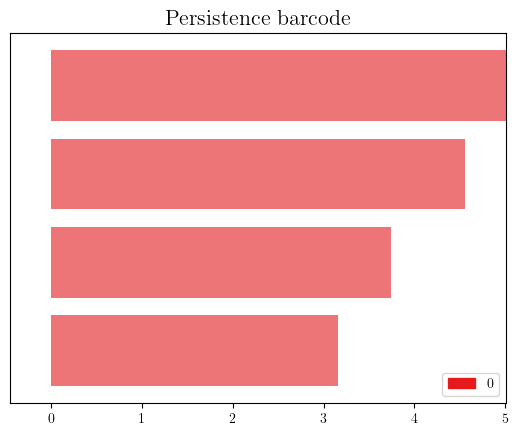

In [123]:
compute_phrase_distances_and_homology(context[0], text_2[0], "לצפות בזרחת השמש")

In [126]:
text_3 = ["במהלך שנת הלימודים הראשונה שלי באוניברסיטה, הצטרפתי לקבוצת טיול שהגיעה להר האייפל. למרות הקור החודר, הייתי מחויב לעלות לפסגה בכל בוקר, כדי לצפות בזרחת השמש מעל פריס"]

Tokens of the sub-collection: ['לצפות', 'בזר', '##חת', 'השמש']
Distance matrix: (4, 4)
Distance matrix: [[0.         4.17645827 3.95791445 5.02237275]
 [4.17645827 0.         3.82641877 4.72715908]
 [3.95791445 3.82641877 0.         4.49109128]
 [5.02237275 4.72715908 4.49109128 0.        ]]


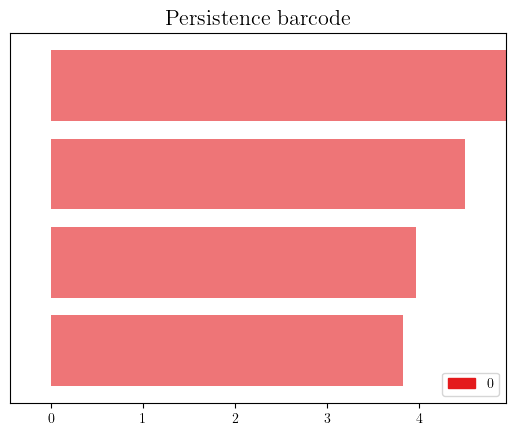

In [127]:
compute_phrase_distances_and_homology(context[0], text_3[0], "לצפות בזרחת השמש")

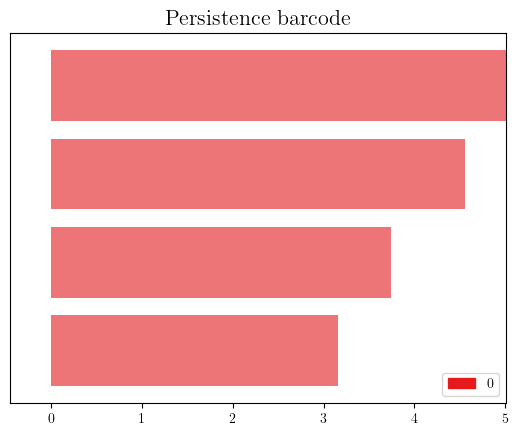

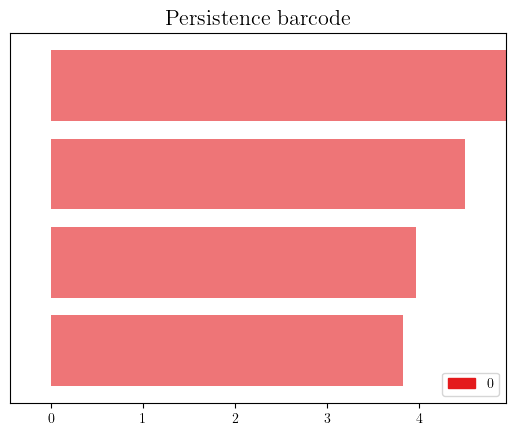

Bottleneck distance: 0.6668994780581823
Wasserstein distance: = 0.94


In [137]:
# from gudhi.wasserstein import wasserstein_distance 
# Could also be: 
from gudhi.hera import wasserstein_distance
import numpy as np

def compute_phrase_distances_and_homology(context_vectors, sentence, phrase):
    tokenizer = BertTokenizer.from_pretrained('onlplab/alephbert-base')

    sentence_tokens = tokenizer.encode(sentence, add_special_tokens=False)
    phrase_tokens = tokenizer.encode(phrase, add_special_tokens=False)

    phrase_indices = [i for i, token in enumerate(sentence_tokens) if token in phrase_tokens]

    phrase_context_vectors = context_vectors[0, phrase_indices]

    phrase_context_vectors_np = phrase_context_vectors.detach().numpy()

    distances = distance_matrix(phrase_context_vectors_np, phrase_context_vectors_np)

    rips_complex = gd.RipsComplex(distance_matrix=distances, max_edge_length=np.max(distances))
    simplex_tree = rips_complex.create_simplex_tree(max_dimension=2)
    persistent_homology = simplex_tree.persistence(min_persistence=0.001)

    gd.plot_persistence_barcode(persistence=persistent_homology)
    plt.show()

    # Convert the persistent homology data to a numpy array
    persistent_homology_np = np.array([[pt[1][0], pt[1][1]] for pt in persistent_homology if pt[1][1] != float('inf')])

    return persistent_homology_np


def compute_homology_distances(context, text_1, text_2, phrase):
    homology_1 = compute_phrase_distances_and_homology(context[0], text_1[0], phrase)
    homology_2 = compute_phrase_distances_and_homology(context[0], text_2[0], phrase)

    # Compute and print the bottleneck distance
    bottleneck_dist = gd.bottleneck_distance(homology_1, homology_2)
    print(f"Bottleneck distance: {bottleneck_dist}")

    # Compute and print the Wasserstein distance
    print(f"Wasserstein distance: = {wasserstein_distance(homology_1, homology_2, order=1., internal_p=2.):.2f}")
    #wasserstein_dist = gd.wasserstein.wasserstein_distance(homology_1, homology_2, matching=False, order=1.0, internal_p=inf, enable_autodiff=False, keep_essential_parts=True)
    #print(f"Wasserstein distance: {wasserstein_dist}")

# Call the function
compute_homology_distances(context, text_2, text_3, "לצפות בזרחת השמש")


It looks like the code is working as expected now, and it successfully calculated the Bottleneck and Wasserstein distances between the two persistent homology diagrams. 

To interpret these values:

- The Bottleneck distance is a measure of the maximum difference between two persistence diagrams. It's essentially looking for the furthest point (representing a topological feature) that cannot be matched between the two diagrams. A smaller Bottleneck distance means the diagrams (and hence the topological features they represent) are more similar.

- The Wasserstein distance, on the other hand, is a more nuanced measure that takes into account all of the points in the diagrams, not just the furthest one. It's a measure of the cost of transforming one diagram into the other, where the cost is quantified by the amount of "movement" of the points (topological features). Again, a smaller Wasserstein distance means the diagrams are more similar.

In this case, the Bottleneck distance is 0.6669 and the Wasserstein distance is 0.94. These values are relative and depend on the specific data and context vectors you're working with, so it's hard to say definitively what these numbers mean without additional context. However, in general, smaller values would indicate that the phrase "לצפות בזרחת השמש" has similar topological features in the context of the two different sentences. Note that the interpretation of these distances in the context of NLP and BERT embeddings is a novel and complex topic, and the meanings and implications may be subject to ongoing research and discussion. With that said, one might speculate that collocations and multiword expressions should have a similar topological structure in different contexts, making the learning of their unique meaning when group together more represented by the geometry of the context vectors learned by the model. This could be used to improve the model's performance on representing the meaning of collocations and multiword expressions geometrically. If this hypothesis is true, including this in the training objective might significantly improve performance of language models on tasks like collocation and multiword extraction. This could obviously then be applied to things like document summarization, search, subject of content mathcing, and others. 